In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/tnavarrete-iedib/bigdata-24-25/refs/heads/main/naixements.csv', sep=';', thousands=".")
df.head()

,Nacional y Comunidades autónomas,Edad de la madre,Orden del nacido vivo,Periodo,Total
0,Total Nacional,Todas las edades,Todos,2023,320656
1,Total Nacional,Todas las edades,Todos,2022,329251
2,Total Nacional,Todas las edades,Todos,2021,337380
3,Total Nacional,Todas las edades,Todos,2020,341315
4,Total Nacional,Todas las edades,Todos,2019,360617


### 1. Gráfico circular con Matplotlib que muestre el porcentaje de nacimientos en toda España en 2023 según el grupo de edad de la madre. Cada grupo de edad debe tener un color diferente. Usa una paleta de Seaborn para los colores.


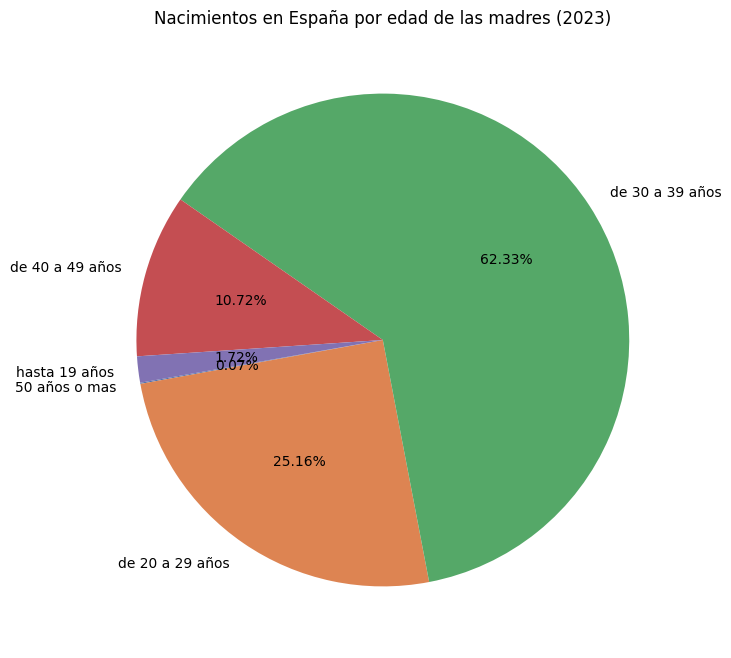

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

def classify_age(age):
  if age == 'Todas las edades':
    return None
  elif age in ['Menos de 15 años', '15 años', '16 años', '17 años', '18 años', '19 años']:
    return 'hasta 19 años'
  elif age in ['20 años', '21 años', '22 años', '23 años', '24 años', '25 años', '26 años', '27 años', '28 años', '29 años']:
    return 'de 20 a 29 años'
  elif age in ['30 años', '31 años', '32 años', '33 años', '34 años', '35 años', '36 años', '37 años', '38 años', '39 años']:
    return 'de 30 a 39 años'
  elif age in ['40 años', '41 años', '42 años', '43 años', '44 años', '45 años', '46 años', '47 años', '48 años', '49 años']:
    return 'de 40 a 49 años'
  else:
    return '50 años o mas'


df_1 = df[(df['Periodo'] == 2023)].copy()
df_1['Edad de la madre'] = df_1['Edad de la madre'].apply(classify_age)
df_1 = df_1.groupby('Edad de la madre').sum().reset_index()

values = df_1['Total']
labels = df_1['Edad de la madre']

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.2f%%', startangle=190, colors=sns.color_palette('deep', len(labels)))
plt.title('Nacimientos en España por edad de las madres (2023)')
plt.show()

### 2.	Gráfico de barras verticales agrupadas con Seaborn (sin mostrar la barra de errores), que muestre en el eje X las comunidades autónomas mediterráneas (Islas Baleares, Cataluña, Comunidad Valenciana, Región de Murcia y Andalucía) y en el eje Y el número de nacimientos en el año 2023, con los valores agrupados por grupo de edad. Para una comunidad autónoma, puedes hacer una barra por cada grupo de edad, o bien una única barra con colores diferentes para cada grupo de edad. En cualquier caso, cada grupo de edad debe tener un mismo color en todo el gráfico y se debe mostrar en una leyenda.

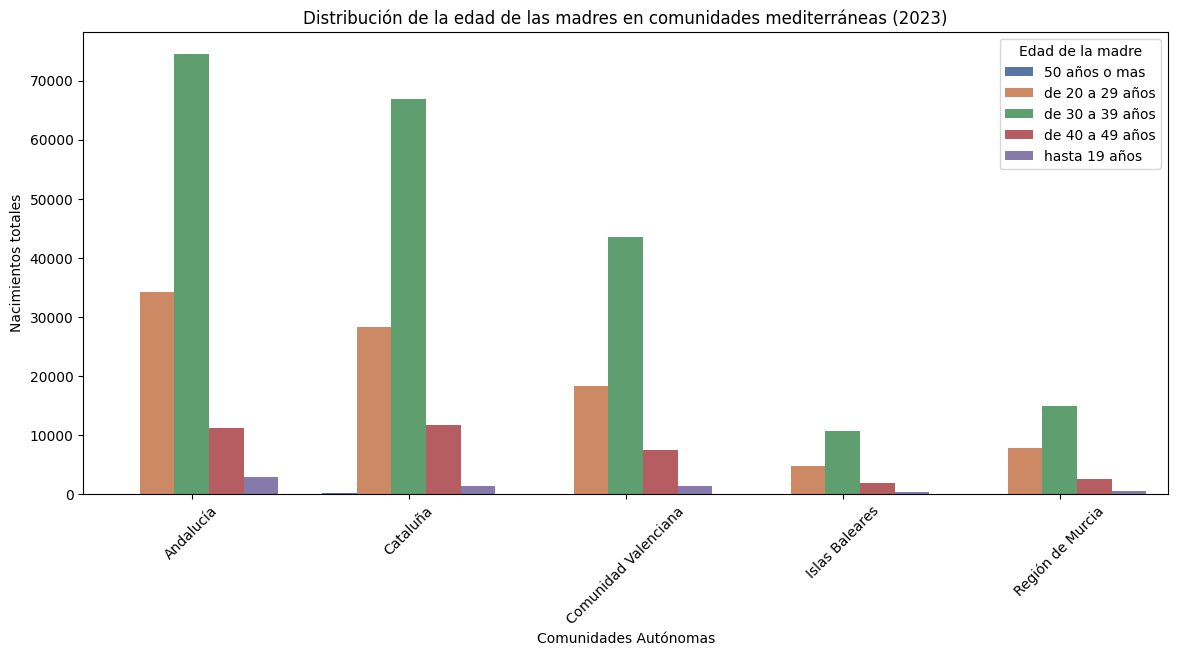

In [3]:
mediterranean_communities = {
    '01 Andalucía': 'Andalucía',
    '04 Balears, Illes': 'Islas Baleares',
    '09 Cataluña': 'Cataluña',
    '10 Comunitat Valenciana': 'Comunidad Valenciana',
    '14 Murcia, Región de': 'Región de Murcia'
}

df_2 = df[(df['Periodo'] == 2023) & (df['Nacional y Comunidades autónomas'].isin(mediterranean_communities))].copy()
df_2['Nacional y Comunidades autónomas'] = df_2['Nacional y Comunidades autónomas'].map(mediterranean_communities)
df_2['Edad de la madre'] = df_2['Edad de la madre'].apply(classify_age)
df_2 = df_2.groupby(['Nacional y Comunidades autónomas', 'Edad de la madre']).sum().reset_index()

unique_ages = df_2['Edad de la madre'].nunique()
color_palette = sns.color_palette('deep', unique_ages)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_2,
    x='Nacional y Comunidades autónomas',
    y='Total',
    hue='Edad de la madre',
    errorbar=None,
    palette=color_palette
)

plt.xticks(rotation=45)
plt.title('Distribución de la edad de las madres en comunidades mediterráneas (2023)')
plt.xlabel('Comunidades Autónomas')
plt.ylabel('Nacimientos totales')

plt.show()


### 3.	Gráfico de barras verticales agrupadas con Plotly (sin mostrar la barra de errores), que muestre en el eje X el año (de 2009 a 2023) y en el eje Y el número de nacimientos, agrupados por orden de nacimiento (agrupados como hemos dicho antes, en primero, segundo y tercero o posterior). Para un año, puedes hacer una barra por cada orden de nacimiento, o bien una única barra con colores diferentes para cada orden. En cualquier caso, cada orden de nacimiento debe tener un mismo color en todo el gráfico y se debe mostrar en una leyenda.

In [4]:
import plotly.express as px

def classify_birth_order(order):
  if order == 'Primero':
    return 'Primer hijo'
  elif order == 'Segundo':
    return 'Segundo hijo'
  else:
    return 'Tercer hijo o posterior'

df_3 = df[(df['Periodo'] >= 2009) & (df['Periodo'] <= 2023)].copy()
df_3['Orden del nacido vivo'] = df_3['Orden del nacido vivo'].apply(classify_birth_order)
df_3 = df_3.groupby(['Periodo', 'Orden del nacido vivo']).sum().reset_index()

fig = px.bar(df_3, x='Periodo', y='Total', color='Orden del nacido vivo', barmode='group', title='Nacimientos por orden de nacimiento (2009-2023)')
fig.update_layout(xaxis_title='Año', yaxis_title='Número de nacimientos')
fig.update_xaxes(dtick=1)
fig.show()

### 4.	Gráfico de líneas y puntos con Seaborn que muestre la evolución en el número de nacimientos en España en el periodo 2009-2023. Se deben mostrar 3 líneas, una por cada orden de nacimiento (agrupados como hemos dicho antes). Cada una de las tres líneas debe tener un color diferente y se debe mostrar en una leyenda.

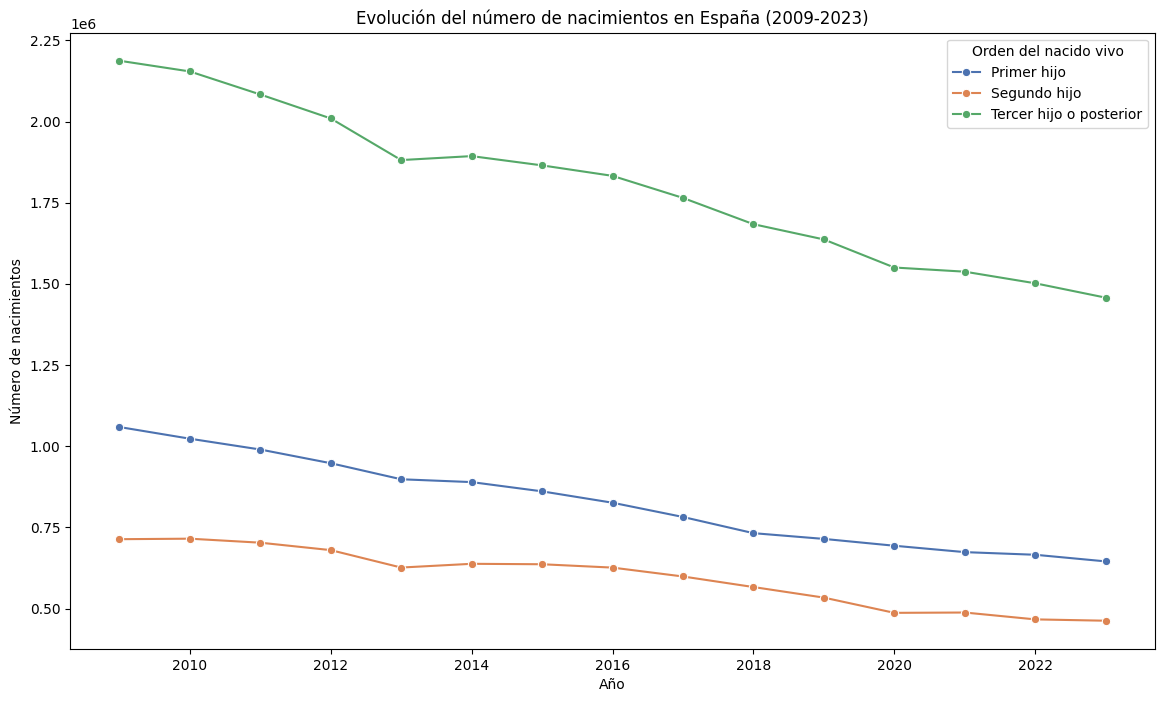

In [5]:
plt.figure(figsize=(14,8))
sns.lineplot(
    data = df_3,
    x = "Periodo",
    y = "Total",
    hue = 'Orden del nacido vivo',
    marker = 'o',
    palette = 'deep')

plt.title('Evolución del número de nacimientos en España (2009-2023)')
plt.xlabel('Año')
plt.ylabel('Número de nacimientos')
plt.legend(title='Orden del nacido vivo')
plt.show()

### 5.	Gráfico de líneas y puntos con Plotly que muestre la evolución en el número de nacimientos en las Islas Baleares en el periodo 2009-2023. Se deben mostrar 5 líneas, una por cada grupo de edad de la madre. Cada una de las cinco líneas debe tener un color diferente y se debe mostrar en una leyenda.

In [6]:
df_5 = df[(df['Periodo'] >= 2009) & (df['Periodo'] <= 2023) & (df['Nacional y Comunidades autónomas'] == '04 Balears, Illes')].copy()
df_5['Edad de la madre'] = df_5['Edad de la madre'].apply(classify_age)
df_5 = df_5.groupby(['Periodo', 'Edad de la madre']).sum().reset_index()

figure = px.line(
    df_5,
    x='Periodo',
    y='Total',
    color='Edad de la madre',
    title='Evolución del número de nacimientos en Islas Baleares (2009-2023)'
)

figure.update_layout(
    xaxis_title='Año',
    yaxis_title='Número de nacimientos',
    legend_title='Edad de la madre'
)
figure.show()

### 6.	Diagrama de cajas (boxplot) con Seaborn que muestre el número de nacimientos en las Islas Baleares a lo largo del periodo 2009-2023, para cada uno de los grupos de edad. Cada grupo de edad debe tener un color diferente y se debe mostrar en una leyenda.


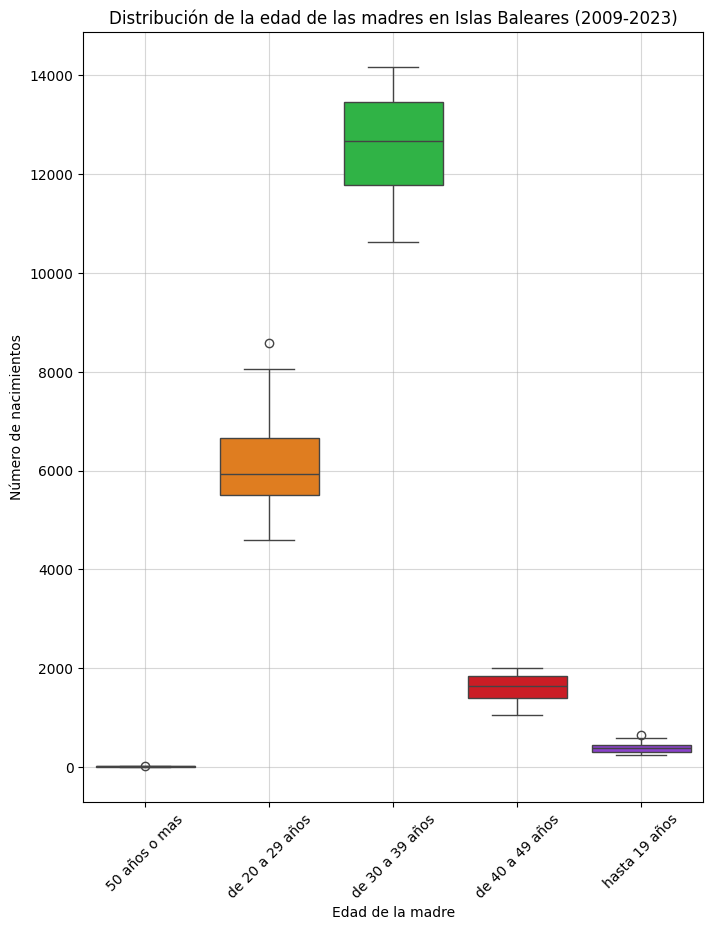

In [7]:
plt.figure(figsize=(8,10))
sns.boxplot(
    data=df_5,
    x='Edad de la madre',
    y='Total',
    hue='Edad de la madre',
    palette='bright'
  )

plt.title('Distribución de la edad de las madres en Islas Baleares (2009-2023)')
plt.xlabel('Edad de la madre')
plt.ylabel('Número de nacimientos')
plt.grid(True, alpha=0.5)
plt.xticks(rotation=45)

plt.show()

### 7.	Diagrama de cajas (boxplot) con Plotly que muestre el número total de nacimientos del periodo 2009-2023, para cada comunidad autónoma mediterránea. Cada comunidad autónoma debe tener un color diferente y se debe mostrar en una leyenda.

In [8]:
df_7 = df[(df['Periodo'] >= 2009) & (df['Periodo'] <= 2023) & (df['Nacional y Comunidades autónomas'].isin(mediterranean_communities))].copy()
df_7['Nacional y Comunidades autónomas'] = df_7['Nacional y Comunidades autónomas'].map(mediterranean_communities)

figure = px.box(
    df_7,
    x='Nacional y Comunidades autónomas',
    y='Total',
    color='Nacional y Comunidades autónomas',
    title='Distribución del número de nacimientos en comunidades mediterráneas (2009-2023)'
)

figure.update_layout(
    xaxis_title='Comunidades Autónomas',
    yaxis_title='Número de nacimientos',
    legend_title='Comunidades Autónomas'
)
figure.show()

### 8.	Interfaz con Dash que permita seleccionar una comunidad o ciudad autónoma, y muestre un diagrama de barras verticales agrupadas que muestre en el eje X el grupo de edad, en el eje Y el número de nacimientos, con los valores agrupados por orden de nacimiento (primer hijo, segundo hijo, etc.). Cada orden de nacimiento debe tener un color diferente y se debe mostrar en una leyenda.

In [9]:
!pip install datashader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 42.7 MB/s eta 0:00:00


In [10]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.6 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [11]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Nacimientos por Comunidad Autónoma'),
    dcc.Dropdown(
        id="bar-chart-x-dropdown",
        options = [
            {'label': 'Andalucía', 'value': '01 Andalucía'},
            {'label': 'Aragón', 'value': '02 Aragón'},
            {'label': 'Asturias', 'value': '03 Asturias, Principado de'},
            {'label': 'Islas Baleares', 'value': '04 Balears, Illes'},
            {'label': 'Islas Canarias', 'value': '05 Canarias'},
            {'label': 'Cantabria', 'value': '06 Cantabria'},
            {'label': 'Castilla y León', 'value': '07 Castilla y León'},
            {'label': 'Castilla-La Mancha', 'value': '08 Castilla - La Mancha'},
            {'label': 'Cataluña', 'value': '09 Cataluña'},
            {'label': 'Comunidad Valenciana', 'value': '10 Comunitat Valenciana'},
            {'label': 'Extremadura', 'value': '11 Extremadura'},
            {'label': 'Galicia', 'value': '12 Galicia'},
            {'label': 'Madrid', 'value': '13 Madrid, Comunidad de'},
            {'label': 'Región de Murcia', 'value': '14 Murcia, Región de'},
            {'label': 'Navarra', 'value': '15 Navarra, Comunidad Foral de'},
            {'label': 'País Vasco', 'value': '16 País Vasco'},
            {'label': 'La Rioja', 'value': '17 Rioja, La'},
            {'label': 'Ceuta', 'value': '18 Ceuta'},
            {'label': 'Melilla', 'value': '19 Melilla'}
        ],
        value="04 Balears, Illes",
        clearable=False,
    ),
    dcc.Graph(id="bar-chart-x-graph"),
])


@app.callback(
    Output("bar-chart-x-graph", "figure"),
    Input("bar-chart-x-dropdown", "value"))
def update_bar_chart(community):
    df_8 = df[(df['Nacional y Comunidades autónomas'] == community) & (df['Periodo'] >= 2009) & (df['Periodo'] <= 2023)].copy()
    df_8['Orden del nacido vivo'] = df_8['Orden del nacido vivo'].apply(classify_birth_order)
    df_8['Edad de la madre'] = df_8['Edad de la madre'].apply(classify_age)
    df_8 = df_8.groupby(['Edad de la madre', 'Orden del nacido vivo']).sum().reset_index()

    fig = px.bar(df_8, x="Edad de la madre", y="Total",
                 color="Orden del nacido vivo", barmode="group")
    return fig


if __name__ == "__main__":
    app.run_server(debug=True)

<IPython.core.display.Javascript object>